# 🧩 Level 1.3: The Great XOR Crisis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/ai-mastery-from-scratch/blob/main/notebooks/phase_1_neuron_chronicles/1.3_xor_crisis.ipynb)

---

## 🎯 The Challenge: Why Can't One Neuron Solve Everything?

In this lesson, you'll discover the famous XOR problem—a puzzle that exposes the limits of a single neuron. We'll see why some problems can't be solved with just one neuron, no matter how hard you try!

### What You'll Discover:
- The structure of the XOR dataset
- Why a single neuron fails on XOR
- Visual intuition for linear vs. non-linear problems
- The need for multi-layer networks

Let's dive in!

## 🚀 Setup & Imports

*Run the cell below to set up your environment. This works in both Google Colab and local Jupyter notebooks.*

In [1]:
# 📦 Install Required Packages
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install ipywidgets --quiet

print("✅ All packages installed!")

✅ All packages installed!


In [2]:
# 🔧 Environment Check & Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

print("🎯 Environment ready!")

🎯 Environment ready!


## 🧬 Generate XOR Dataset

Let's create a synthetic XOR dataset. XOR is a classic example where the output is 1 if the inputs are different, and 0 if they are the same.

In [3]:
# Generate XOR data (2D)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Add a little noise for visualization
np.random.seed(42)
X_noisy = X + 0.08 * np.random.randn(*X.shape)


## 👀 Visualize XOR Data

Let's plot the XOR dataset. Notice how the classes are arranged—can you draw a single straight line to separate them?

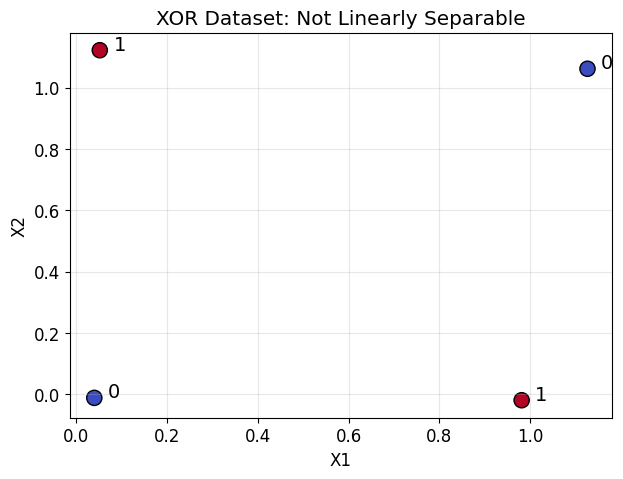

In [4]:
# Plot XOR data
plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
for i, (x, label) in enumerate(zip(X_noisy, y)):
    plt.text(x[0]+0.03, x[1], str(label), fontsize=14, color='black')
plt.title('XOR Dataset: Not Linearly Separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.show()

## 🧠 Single Neuron Attempt on XOR

Let's try to solve the XOR problem with a single neuron (perceptron) using a sigmoid activation. Will it work?

In [5]:
# Define single neuron (perceptron) with sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def neuron_predict(X, w1, w2, b):
    z = w1 * X[:,0] + w2 * X[:,1] + b
    return sigmoid(z)

# Try some initial weights and bias
w1, w2, b = 1.0, 1.0, -1.0
probs = neuron_predict(X_noisy, w1, w2, b)
preds = (probs > 0.5).astype(int)
print("Predictions:", preds)

Predictions: [0 1 0 1]


## 🖼️ Plot Decision Boundary of Single Neuron

Let's visualize the decision boundary produced by our single neuron on the XOR dataset.

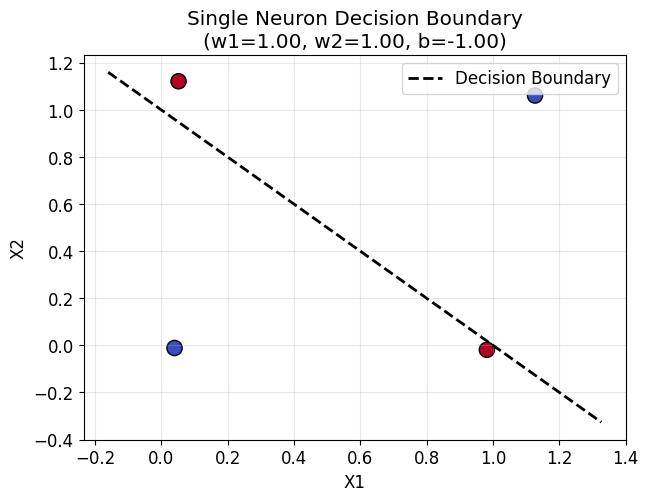

In [6]:
# Plot decision boundary for single neuron

def plot_decision_boundary(w1, w2, b):
    # Plot data
    plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
    # Plot decision boundary: w1*x1 + w2*x2 + b = 0
    x_vals = np.linspace(X_noisy[:,0].min()-0.2, X_noisy[:,0].max()+0.2, 100)
    if w2 != 0:
        y_vals = -(w1 * x_vals + b) / w2
        plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Decision Boundary')
    else:
        plt.axvline(-b/w1, color='k', linestyle='--', linewidth=2, label='Decision Boundary')
    plt.title(f"Single Neuron Decision Boundary\n(w1={w1:.2f}, w2={w2:.2f}, b={b:.2f})")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary(w1, w2, b)

## 🧪 Experiment: Adjust Weights and Bias

Use the sliders below to change the neuron's weights and bias. Can you find any combination that solves the XOR problem?

In [7]:
w1_slider = widgets.FloatSlider(value=1.0, min=-10, max=10, step=0.1, description='w1')
w2_slider = widgets.FloatSlider(value=1.0, min=-10, max=10, step=0.1, description='w2')
b_slider = widgets.FloatSlider(value=0.0, min=-10, max=10, step=0.1, description='bias')

ui = widgets.HBox([w1_slider, w2_slider, b_slider])

def interactive_plot(w1, w2, b):
    plot_decision_boundary(w1, w2, b)
    probs = neuron_predict(X_noisy, w1, w2, b)
    preds = (probs > 0.5).astype(int)
    print("Predictions:", preds)
    print("True labels:", y)
    print("Correct?", np.array_equal(preds, y))

out = widgets.interactive_output(interactive_plot, {'w1': w1_slider, 'w2': w2_slider, 'b': b_slider})
display(ui, out)

Output()

## 🎮 Practice: Try to Solve XOR with One Neuron

- Can you find any weights and bias that make the neuron solve the XOR problem?
- Why does the neuron always fail for at least one point?

**Hint:** The XOR problem is not linearly separable. A single straight line can't separate the classes. This is why we need more than one neuron—get ready for multi-layer networks in the next lesson!

## 🌉 Bridge to the Next Lesson

In the next lesson, you'll discover how adding just one more neuron (and a new layer) unlocks the power to solve XOR and many other problems. Get ready for the magic of multi-layer networks!